# **4.6.1 - "Rotífero ou tardígrado?": Trabalhando com as imagens** 🐛🐻🖼️
**Objetivo**: Implementar uma rede neural convolucional (CNN) utilizando PyTorch ou lightning. Treine esta rede neural em um conjunto de dados de imagens. Explique para o leitor como funciona a camada de convolução de uma CNN  e o motivo de utilizarmos este tipo de arquitetura quando estudamos imagens.

**Dupla**: Júlia Guedes A. dos Santos & Lorena Ribeiro Nascimento
***

### **Introdução** 💡

<p style="text-align:justify;">
O Dataset criado nesse notebook contêm imagens de Tardígrados e Rotíferos, visto que, devido a ética científica, invertebrados vem sendo cada vez mais
utilizados em análises biológicas e ecológicas. Dentre os invertebrados com aplicações biológicas, destaca-se os C. elegans, rotíferos e tardígrados.
</p>

<p style="text-align:justify;">
Rotíferos são organismos microscópicos utilizados em análises ecológicas e toxicológicas, por conta da sua sensibilidade físico-química a mudanças do ambiente. Já os tardígrados são seres de tamanho entre 3-5 mm, que possuem capacidade criptobiótica mediante estresses ambientais, permitindo alta resistência. Essa capacidade é foco de estudos na área de fármacos e terapias, além de análise ecológicas devido a resposta a mudanças ambientais.
</p>

<p style="text-align:justify;">
Todavia a distinção desses organismos em microscópicos óticos é dificultosa, devido a presença de liquens e diversos outros organismos semelhantas,por conta, também, das diferenças entre espécies de rotíferos e de tardígrados, além da posição, transparência e outros aspectos de visualização da imagem.
</p>

<p style="text-align:justify;">
Assim, nesse notebook pretende-se fazer a leitura do dataset criado a partir das imagens coletadas na internet e do microscópio ótico da Ilum-Escola de Ciência. Ao todo, foram coletadas 39 imagens de tardígrados e 32 de rotíferos, sendo que os conjuntos de teste e validação foram compostos por 10 figuras cada e o restante foi contemplado pelos dados de treino. Essas imagens foram compactadas em um arquivo em formato zip em que estão divididas em pastas de treino, validação e teste. Além disso, como é difícil encontrar imagens desses organismos, buscamos aumentar os dados de treino por meio de técnicas de modificações de imagens, tais como rotações e adição de ruídos.
</p>


### **Importação de bibliotecas** 📚

Em primeiro lugar, precisamos importar as bibliotecas necessárias para a resolução da tarefa proposta, as quais envolvem os processos de importação dos arquivos e plot das imagens.

In [29]:
# Importação da base de dados
from google.colab import files

# Módulos do matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Bibliotecas para definição de diretório
import zipfile
import os

#Image Augmentation
from skimage import exposure
from skimage.util import random_noise
from skimage import transform
from cv2 import resize
import numpy as np
import shutil

#Image redimension
import torchvision.transforms as transforms
from PIL import Image
import shutil

### **Download dos dados** 🎲

Primeiramente, precisamos importar as imagens. Para isso, por meio da função "files.upload" - própria da biblioteca Colab - iremos importar o zip que contém as imagens coletadas. Após descompactar os arquivos, esses serão contidos no diretório "/content/imagens", sendo que cada pasta contida no zip dará origem a uma nova pasta no diretório.

In [30]:
uploaded = files.upload()

Saving dataset_Rotiferos-tardigrados.zip to dataset_Rotiferos-tardigrados (1).zip


In [31]:
!unzip dataset_Rotiferos-tardigrados.zip

Archive:  dataset_Rotiferos-tardigrados.zip
   creating: Rotiferos-tardigrados/
   creating: Rotiferos-tardigrados/Teste/
   creating: Rotiferos-tardigrados/Teste/Rotiferos/
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem 31.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem23.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem24.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem25.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem26.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem27.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem28.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem29.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem30.jpg  
  inflating: Rotiferos-tardigrados/Teste/Rotiferos/Imagem32.jpg  
   creating: Rotiferos-tardigrados/Teste/Tardigrados/
  inflating: Rotiferos-tardigrados/Teste/Tardigrados/grado.jpg  
  inflating: Rotiferos-tardigrados/Teste/Tardi

In [34]:
zip_path = "/content/dataset_Rotiferos-tardigrados.zip"  # Caminho para seu zip
# extract_path = "/content/imagens"     # Pasta onde os arquivos serão extraídos
extract_path = "/content"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [45]:
os.listdir("/content/")

['.config',
 'resized_image49.jpg',
 'resized_image21.jpg',
 'resized_image54.jpg',
 'resized_image7.jpg',
 'dataset_Rotiferos-tardigrados.zip',
 'resized_image44.jpg',
 'resized_image50.jpg',
 'resized_image41.jpg',
 'resized_image20.jpg',
 'resized_image40.jpg',
 'resized_image14.jpg',
 'resized_image53.jpg',
 'resized_image39.jpg',
 'resized_image36.jpg',
 'resized_image6.jpg',
 'resized_image19.jpg',
 'resized_image35.jpg',
 'resized_image27.jpg',
 'resized_image11.jpg',
 'resized_image43.jpg',
 'Rotiferos-tardigrados (4).zip',
 'resized_image2.jpg',
 'resized_image9.jpg',
 'imagens',
 'resized_image46.jpg',
 'resized_image37.jpg',
 'resized_image13.jpg',
 'resized_image22.jpg',
 'Rotiferos-tardigrados.zip',
 'resized_image47.jpg',
 'resized_image52.jpg',
 'resized_image24.jpg',
 'Rotiferos-tardigrados (1).zip',
 'resized_image1.jpg',
 'resized_image45.jpg',
 'Rotiferos-tardigrados (2).zip',
 'resized_image3.jpg',
 'resized_image17.jpg',
 'resized_image23.jpg',
 'resized_image30.jp

Após baixar os dados, por meio da biblioteca Matplotlib, podemos visualizar as imagens.

In [36]:
img_path = os.path.join(extract_path, "/content/dataset_Rotiferos-tardigrados/Treino/Tardigrados/imagem12.jpg")
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset_Rotiferos-tardigrados/Treino/Tardigrados/imagem12.jpg'

### **Data Augmentation** 🐥➡️🐓

Um dos principais desafios que podem ser enfrentados durante o treinamento de redes neurais é a disponibilidade limitada de dados. Isso, além de tornar o modelo não muito representativo, pode aumentar o risco de *overfitting*.

Para a mitigação desse problema, duas principais estratégias são comumente utilizadas: criação de dados sintéticos e *data augmentation*. Essa segunda técnica consiste na manipulação - através de transformações geométricas ou adição de ruídos, por exemplo - das imagens originais destinadas para o treino da rede neural. A partir disso, é possível deixar a base de dados mais robusta e representativa para o problema abordado. [1]

#### **Transformações geométricas: Rotação vertical e horizontal** 🔄️

De forma simples, transformações geométricas podem ser entendidas como operações aplicadas a uma figura, resultando em outra figura que mantém características geométricas idênticas ou equivalentes à original.

Existem diferentes operações que podem ser consideradas como transformações geométricas, como translação, reflexão e rotação. Essa última, apesar de poder ser realizada a partir da utilização de diferentes centros de rotação, também pode ser feita mediante a rotações nos eixos verticais e horizontal.

Dessa forma, a partir da utilização das funções fliplr e fliprud da biblioetca Numpy, iremos, respectivamente, testar a rotação da imagem utilizada como teste ("imagem12.png" da pasta de treino da classe dos tardigrados) na vertical e horizontal. [2]

**Rotação Vertical**

In [ ]:
horiz = np.fliplr(img)
plt.imshow(horiz)

**Rotação Horizontal**

In [ ]:
vert = np.flipud(img)
plt.imshow(vert)

#### **Ruído Gaussiano** 🔔

Como outra forma de induzir a criação de novas imagens, é possível adicionar ruídos às imagens pré-existentes. Dentre um dos mais utilizados, destaca-se o ruído gaussiano, o qual é uma forma de ruído aleatório na qual a função de densidade probabilidade (pdf) segue uma distribuição normal, tal como a demonstrada pela figura 1.

No contexto abordado, o ruído gaussiano é particularmente relevante, já que esse tipo de interferência é comumente observado em imagens obtidas por microscopia óptica.

Para a adição do ruído às imagens, a função random_noise, também da biblioteca Numpy, pode ser utilizada, com a especificação do argumento "mode" para "gaussian" (indicativo da aplicação do ruído gaussiano).

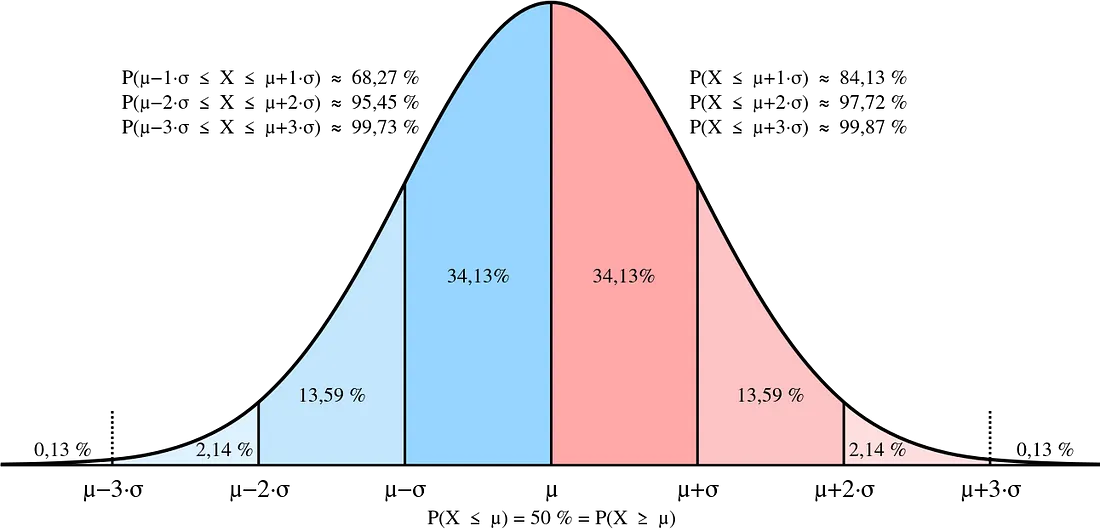

<p style="text-align:center;">
[Figura 1: Distribuição Gaussiana]
</p>

In [ ]:
noise = random_noise(img, mode="gaussian", clip=True)
plt.imshow(noise)

**Manipulação das imagens** 🔔🔄️➡️🖼️

Partindo das técnicas abordadas anteriormente, a função "Augmentation" será definida. Nela, dado um determinado diretório, cada imagem contida ou será rotacionada (verticalmente ou horizontalmente) ou receberá adição de ruído gaussiano, sendo que a escolha dependerá do sorteio realizado por meio da biblioteca Random. Ao final, em ambas as pastas contidas no diretório de treino (referentes as labels Tardigrados e Rotíferos), as imagens serão "duplicadas", com a duplicata sendo indicada pela inserção do nome da operação realizada ao final do título da figura.

In [ ]:
import random
def augmentation(caminho):
  num_imagem = 0
  for i in os.listdir(caminho):
    img_path = os.path.join(f"{caminho}{i}")  # Substitua pelo nome da imagem
    img = mpimg.imread(img_path)
    num_imagem += 1
    sorteio = random.choices(['gauss_noise', 'horizontal','vertical'])   #sorteia o tipo de modificação

    if sorteio == 'gauss_noise':
      noise = random_noise(img, mode="gaussian", clip=True)

    elif sorteio == 'horizontal':
      horiz = np.fliplr(img)

    else:
      vert = np.flipud(img)

    plt.savefig(f"{caminho}{num_imagem}_{sorteio}.png")


In [ ]:
augmentation(caminho='/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/') # aplicação da função

In [ ]:
tardigrados = os.listdir('/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/') # listagem de todos os arquivos contidos no diretório
tardigrados

In [ ]:
for arquivo in tardigrados:
  if arquivo.lower().endswith(('.jpg', '.jpeg')):
    nome_arquivo_t = os.path.splitext(arquivo)[0]
    plt.savefig(f"/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/{nome_arquivo_t}.png")
  else:
    continue


In [ ]:
"""Redimensionando as imagens para o mesmo tamanho com Pytorch"""
numero = 1
for arquivo in tardigrados:
    # Abre a imagem
    img = Image.open(f"/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/{arquivo}")

    # Converte para RGB se estiver em RGBA ou outros modos
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Redimensiona com PyTorch
    resize_transform = transforms.Resize((32, 32))

    resized_img = resize_transform(img)

    pasta_saida = "imagens_redimensionadas"

    # Verifica se o arquivo já existe
    if os.path.exists(f'/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/{arquivo}'):
        os.remove(f'/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/{arquivo}')

    resized_img.save(f'/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados/resized_image{numero}.jpg')

    numero += 1


In [ ]:
os.listdir('/content/imagens/dataset_Rotiferos-tardigrados/Treino/Tardigrados')

Fazendo o aumento dos dados das imagens de treino para os Rotiferos.

In [ ]:
augmentation('/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/')

In [ ]:
rotiferos = os.listdir('/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/')

In [ ]:
for arquivo in rotiferos:
  if arquivo.lower().endswith(('.jpg', '.jpeg')):
    nome_arquivo_r = os.path.splitext(arquivo)[0]
    plt.savefig(f"/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/{nome_arquivo_r}.png")
  else:
    continue

In [ ]:
"""Redimensionando as imagens para o mesmo tamanho com Pytorch"""
numero = 1
for arquivo in rotiferos:
    # Abre a imagem
    img = Image.open(f"/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/{arquivo}")

    # Converte para RGB se estiver em RGBA ou outros modos
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Redimensiona com PyTorch
    resize_transform = transforms.Resize((32, 32))

    resized_img = resize_transform(img)

    pasta_saida = "imagens_redimensionadas"

    # Verifica se o arquivo já existe
    if os.path.exists(f'/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/{arquivo}'):
      os.remove(f'/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/{arquivo}')

    resized_img.save(f'/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos/resized_image{numero}.jpg')

    numero += 1


In [ ]:
os.listdir("/content/imagens/dataset_Rotiferos-tardigrados/Treino/Rotiferos")

Para fazer o download da versão atualizada desses arquivos em formato zip, podemos utilizar o módulo shutil. [5]

In [ ]:
shutil.make_archive("dataset_rotiferos_tardigrados_aumentado", "zip", "/content/imagens/Rotiferos-tardigrados",  )

In [ ]:
os.getcwd()

In [ ]:
os.listdir("/content/rotiferos_tardigrados_aumentado.zip")

### **Conclusão** 😶‍🌫️

Portanto, geramos o dataset desejado com os imagens de tardígrados e rotíferos, que será utilizado para o desenvolvimento da rede neural convolucional. Assim como, aumentou-se os dados obtidos, buscando um melhor desempenho da rede, ou, ao menos, maior volumes de informações para sua empregação.

### **Referências** 🗃️

[1]  Dahms, H.-U., Hagiwara, A. & Lee, J.-S. Ecotoxicology, ecophysiology, and 
mechanistic studies with rotifers. Aquat. Toxicol. 101, 1–12 (2011).

[2] (PDF) The biomedical potential of tardigrade proteins: A review. ResearchGate (2024) 
doi:10.1016/j.biopha.2022.114063

[3] SCIENCE, ODSC-Open Data. Image Augmentation for Convolutional Neural Networks. Disponível em: <https://odsc.medium.com/image-augmentation-for-convolutional-neural-networks-18319e1291c>. Acesso em: 14 abr. 2025.

[4]Transformações geométricas: translação, rotação e reflexão. Toda Matéria. Disponível em: <https://www.todamateria.com.br/transformacoes-geometricas/>. Acesso em: 14 abr. 2025.

[5] YADAV, Amit. What is Gaussian Noise and Why It’s Useful? Disponível em: <https://medium.com/@amit25173/what-is-gaussian-noise-and-why-its-useful-b3c50dd14628>. Acesso em: 14 abr. 2025.

[6] Gaussian noise. In: Wikipedia. [s.l.: s.n.], 2025. Disponível em: <https://en.wikipedia.org/w/index.php?title=Gaussian_noise&oldid=1285312637>. Acesso em: 15 abr. 2025.

[7] shutil — High-level file operations. Python documentation. Disponível em: <https://docs.python.org/3/library/shutil.html>. Acesso em: 15 abr. 2025.